<a href="https://colab.research.google.com/github/archita924/CSA522_ML/blob/master/hand_writing_using_decision_tree_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline




In [21]:
#from google.colab import drive
#drive.mount('//drive.google.com/file/d/1cbB7uTqNGDpDZMeKOE_bJ83mjIJgsTbQ/view?usp=drive_link')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

Data

In [24]:
data=pd.read_csv('/digit recognizer train.csv')



test_df = pd.read_csv('/digit recognizer test.csv')


# 1. Data Cleaning

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [26]:
#data=pd.read_csv('digit recognizer train.csv')



#test_df = pd.read_csv('digit test.csv')




print(test_df.shape)


print(data.shape)


(28000, 784)
(42000, 785)


# 2.EDA

In [27]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [28]:
test_df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [29]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [31]:
X=data.iloc[:,1:].values
X.shape

(42000, 784)

In [32]:
X1=test_df.iloc[:,1:].values
X1.shape

(28000, 783)

In [33]:
y=data.iloc[:,0].values
y.shape

(42000,)

In [34]:
y1=test_df.iloc[:,0].values
y1.shape

(28000,)

# 4. Model Building

In [35]:
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)#20% data in testing


In [36]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=9)#20% data in testing


In [37]:
X_train.shape

(33600, 784)

In [38]:
X1_train.shape

(22400, 783)

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [40]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_test[100]  #100 th image is of digit 5

5

array([5])

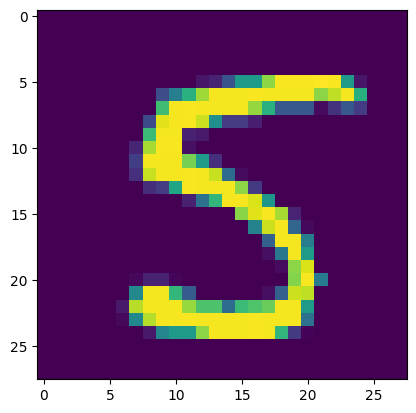

In [42]:
plt.imshow(X_test[100].reshape(28,28))


classifier.predict(X_test[100].reshape(1,784))

array([7])

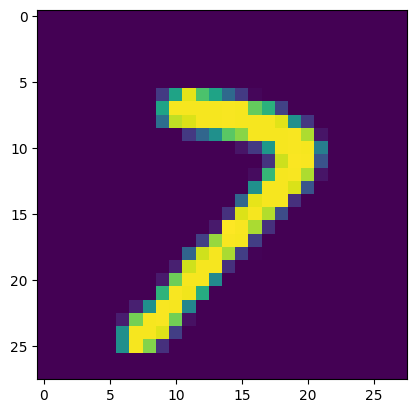

In [43]:
plt.imshow(X_test[200].reshape(28,28))


classifier.predict(X_test[200].reshape(1,784))

In [44]:
y_test[200]

7

In [45]:
classifier.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [46]:
X1_test.shape

(5600, 783)

In [47]:
X1_test.shape

(5600, 783)

In [48]:
X1_test.shape

(5600, 783)

In [49]:
X1_test.shape

(5600, 783)

In [50]:
y1_test[300]

0

In [51]:
X1_test[200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 113,
        63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 225,
       243, 252, 241, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [52]:
y1_test[253]

0

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()
# by this we create an instance of the k nearest neighbor which helps us in reusability of the same model on different datset
#it also helps us for parameter tuning of the model
knn.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_train)

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9783333333333334
